# IR GEP dataset

In [57]:
import mat73  # scipy cannot read v7.3 mat files grrr


In [58]:
dataset = mat73.loadmat("data/IR_P_G_ALL.mat")
data = dataset["Data"]
print(data)


[[ 3.85731  4.31115  3.30899 ...  4.02891  4.30344  2.57333]
 [ 5.93218  5.81761  5.10073 ...  5.0095   5.9533   5.53275]
 [ 3.07467  2.5465   3.35579 ...  3.46069  2.81486  2.95416]
 ...
 [ 4.42012  4.61513  4.9956  ...  4.57884  4.6587   4.48902]
 [ 8.83048  8.95853  9.05849 ...  8.60897  8.73814  9.05038]
 [ 9.8037   9.91875  9.71653 ... 10.64682 10.8741  10.40309]]


**REMARK**: we denote with *loads* the eigenvectors, i.e. the principal components, while we denote with *score* the projection of the original data onto the diagonal space.

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=data.shape[1])
pca.fit(data)

import numpy as np

cov_mat = np.cov(data.T)


Load = pca.components_
Score = pca.transform(data)
Eigval = np.linalg.eigvals(cov_mat)


Let's normalize the eigenvalues and plot them in a bar plot

<BarContainer object of 36 artists>

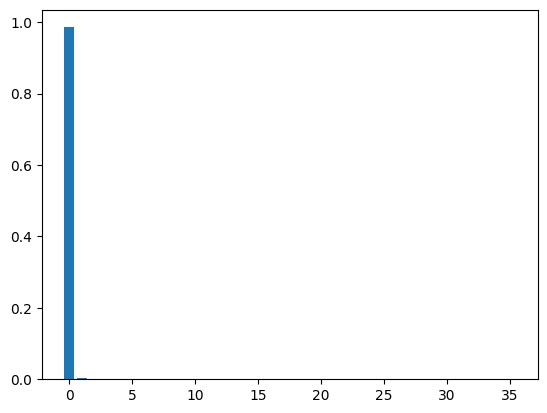

In [60]:
Eigval = Eigval / np.sum(Eigval)

from matplotlib import pyplot as plt

plt.bar(np.arange(Eigval.shape[0]), Eigval)


As we can see, the first eigenvalue is way bigger than the others.
In order to see also the other eigenvalues we can change the plot's scaling, e.g. with a square root.

<BarContainer object of 36 artists>

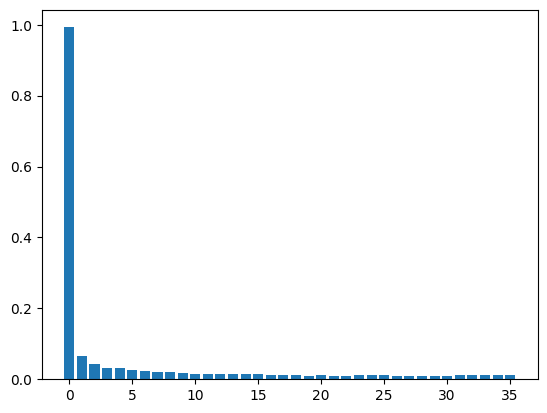

In [61]:
plt.bar(np.arange(Eigval.shape[0]), np.sqrt(Eigval))


The first eigenvalue is not really relevant for our analysis, it gives us info about the shape of the distribution.
What about other eigenvalues?

<Axes: >

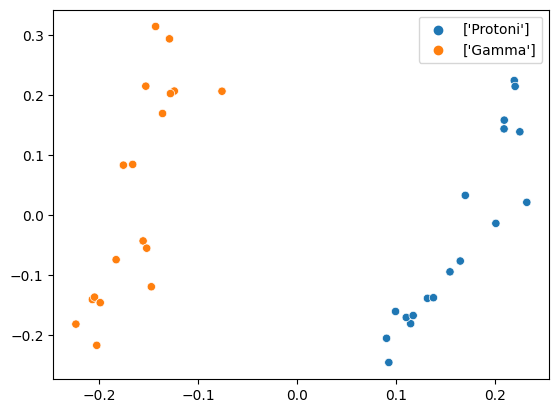

In [62]:
import seaborn as sns

sns.scatterplot(x=Load[1, :], y=Load[2, :], hue=[str(x) for x in dataset["IRtype"]])


We can easily see the separation of the points in two different classes.
Moreover, we can see a clear-cut by subdividing data with respect to the time.

<Axes: >

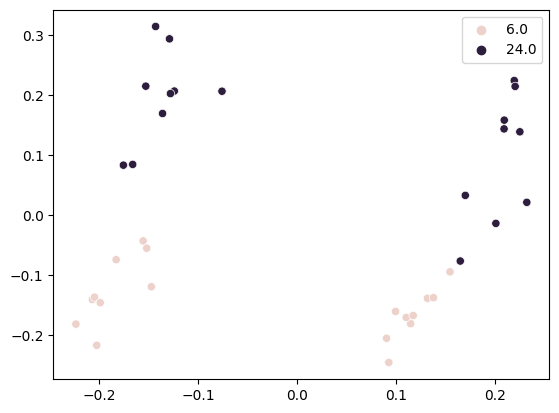

In [63]:
sns.scatterplot(x=Load[1, :], y=Load[2, :], hue=dataset["Time"])


How can we see if a component is informative or not?
Let's look at the principal component: clearly it's not Gaussian but seems to be bimodal (sort-of).
However, we don't get much info from it.

<Axes: ylabel='Count'>

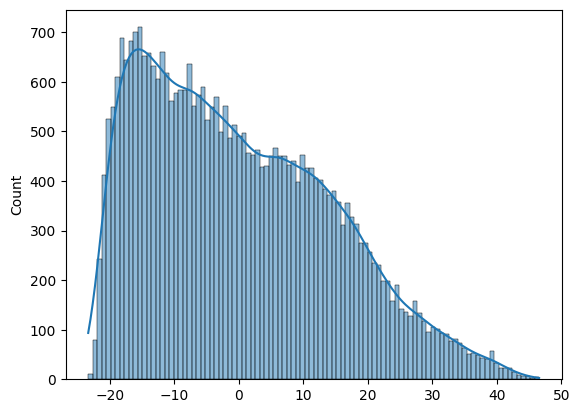

In [64]:
sns.histplot(Score[:, 0], bins=100, kde=True)


By plotting other components we notice that the smaller the component the more Gaussian is the distribution.
The Gaussian behavior is actually a non-informative one, so the smaller is the eigenvalue associated to the component, the smaller is the information we can extract from it.

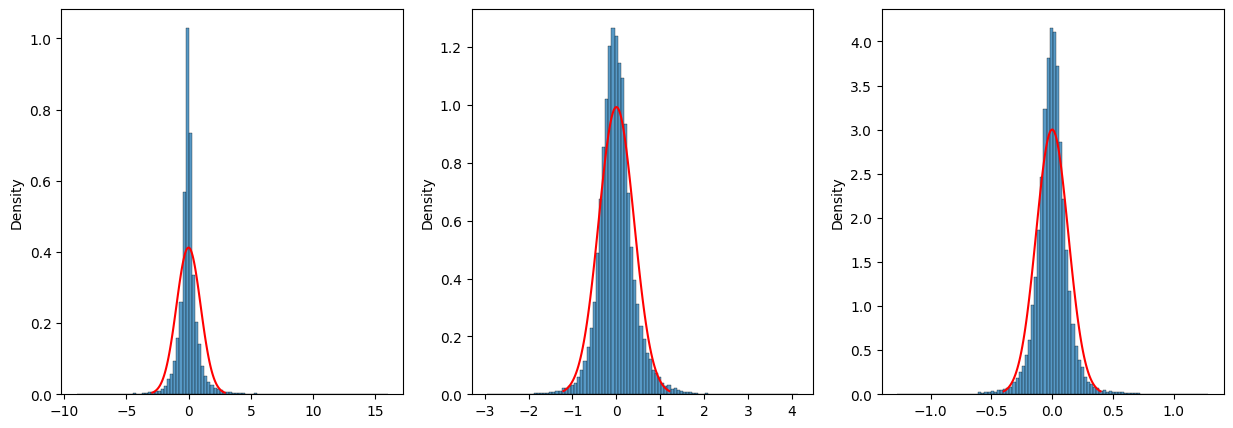

In [65]:
import scipy as sp

fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
sns.histplot(Score[:, 1], bins=100, stat="density", ax=ax[0])
mu, sigma = sp.stats.norm.fit(Score[:, 1])
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
ax[0].plot(x, sp.stats.norm.pdf(x, mu, sigma), color="red")

sns.histplot(Score[:, 5], bins=100, stat="density", ax=ax[1])
mu, sigma = sp.stats.norm.fit(Score[:, 5])
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
ax[1].plot(x, sp.stats.norm.pdf(x, mu, sigma), color="red")

sns.histplot(Score[:, 19], bins=100, stat="density", ax=ax[2])
mu, sigma = sp.stats.norm.fit(Score[:, 19])
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
ax[2].plot(x, sp.stats.norm.pdf(x, mu, sigma), color="red")


To empirically prove the previous statement we can observe that, for the last 2 smallest components we don't have a good separation.

<Axes: >

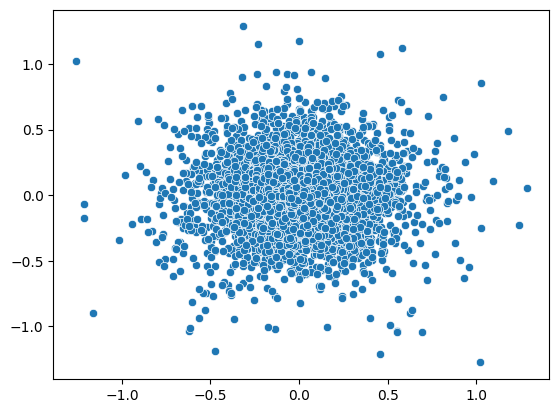

In [66]:
sns.scatterplot(x=Score[:, 34], y=Score[:, 35])
